<a href="https://colab.research.google.com/github/OzKedem/NeuralNetDiabetes/blob/master/DiabetedDetection_OzKedem(English).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning Project - Oz Kedem - Computer Science 5 Units 

The project that you're about to see revolves around building a neural network which can predict whether a person is in risk of developing diabetes type 2.
More information regarding this work as well as the database I used can be found here:
https://github.com/OzKedem/NeuralNetDiabetes

## Importing The Needed Libraries

In [1]:
#First, let's import the needed libraries 
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 1. Load Data

All of the input variables that describe each patient are numerical. 

Hence, load the file as a matrix of floats using the NumPy function `loadtxt()`.

There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y).

The variables can be summarized as follows:

<b>Input Variables (X):</b>

0. Number of times pregnant
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
2. Diastolic blood pressure (mm Hg)
3. Triceps skin fold thickness (mm)
4. 2-Hour serum insulin (mu U/ml)
5. Body mass index (weight in kg/(height in m)^2)
6. Diabetes pedigree function
7. Age (years)

<b>Output Variables (y):</b>

8. Class variable (0 or 1)

In [2]:
# Creating the matrice who's used for holding our data init.
dataset = loadtxt('/content/pima-indians-diabetes.csv', delimiter=',')

In [3]:
dataset
#An example of the way our table is represented as a 2D array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
# Split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [6]:
#Scaling our Input Variables.
X_scaled = scale(X) 
print('Scaled_X:\n', X_scaled)

Scaled_X:
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [7]:
#Split dataset into 'train' & 'test' sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [8]:
# Turning our array to A matrice
y_train = np_utils.to_categorical(y_train)

print('Y_Train Encoded:\n', y_train)

Y_Train Encoded:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


## 2. Define Keras Model


The model design:

- 3 layers.
- 22 total neurons.
- ReLU , Leaky ReLU & Sigmoid activation functions.
- Adam Optimization Function
- Binary Crossentropy Lose Function

In [9]:
#Define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='LeakyReLU'))
model.add(Dense(8, activation='ReLU'))
model.add(Dense(2, activation='sigmoid'))

## 3.Compile Keras Model

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4.Fit Keras Model

In [11]:
#Fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10)
#The history variable, contains info regarding our module for each epoch.

Epoch 1/150
35/35 [==============================] - 1s 7ms/step - loss: 0.6379 - accuracy: 0.7122 - val_loss: 0.6231 - val_accuracy: 0.7176
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5893 - accuracy: 0.7384 - val_loss: 0.5844 - val_accuracy: 0.7471
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7471 - val_loss: 0.5536 - val_accuracy: 0.7412
Epoch 4/150
35/35 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.7674 - val_loss: 0.5317 - val_accuracy: 0.7471
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7820 - val_loss: 0.5143 - val_accuracy: 0.7412
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7762 - val_loss: 0.5027 - val_accuracy: 0.7471
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7791 - val_loss: 0.4983 - val_accuracy: 0.7412
Epoch 8/150
3

## 5. Evaluate Model

In [12]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8054
Accuracy: 80.54


## 6. Prediction

In [13]:
#Determines Whether a person is likely to be diabetic.
predictions = np.argmax(model.predict(X_test), axis=-1)

#Doing so for the first N variables
n = 5
for i in range(n):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y[i]))

[0.6399472601593618, -0.7165334717264664, -0.5741277459136239, 0.7818138030884967, 0.956859653030945, 0.2547804694892943, -0.1264714020604746, 0.8303811324799336] => 0 (expected 1)
[-0.5479185907225473, -0.2783734371474431, 0.30473400231574344, 0.7190857419965655, -0.6928905722954664, 0.47054318659717476, -0.9781448690748636, -1.0415494364835027] => 0 (expected 0)
[-0.5479185907225473, -0.4035620184557355, -0.2639412465385531, -1.2882122129452327, -0.6928905722954664, -0.1513611156549505, -0.9479436823013037, -1.0415494364835027] => 0 (expected 1)
[1.233880185600316, -0.4348591637828086, 0.5632227517949692, -1.2882122129452327, -0.6928905722954664, -0.9382604368719248, 1.1600991544931767, 0.06459135426761878] => 0 (expected 0)
[0.9369137228798391, 0.4727580507023112, 1.0802002507534205, -1.2882122129452327, -0.6928905722954664, -0.26558843647676966, -0.7908975110787921, 1.4259954044228451] => 0 (expected 1)


In [14]:
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1) 

accuracy_score(y_test, y_pred)

0.7322834645669292

In [15]:
print(model.metrics_names)

['loss', 'accuracy']


One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## 7. Plot against loss and accuracy

The plots can provide an indication of useful things about the training of the model, such as:

- It’s speed of convergence over epochs (slope).
- Whether the model may have already converged (plateau of the line).
- Whether the mode may be over-learning the training data (inflection for validation line).

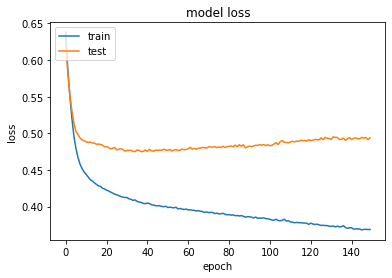

In [17]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

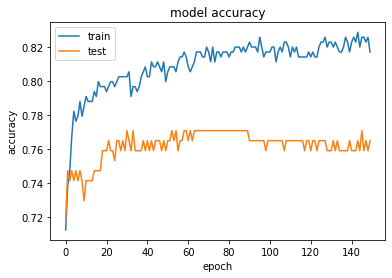

In [18]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()